In [2]:
import torch, torchvision
from torchvision import transforms, datasets

In [3]:
train= datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test= datasets.MNIST("",train=False,download= True,transform=transforms.Compose([transforms.ToTensor]))

In [4]:
trainset= torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset= torch.utils.data.DataLoader(test,batch_size=10,shuffle=False)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28,64)  #Fully Connected 1 , output can be whatever we want
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):   #X is dat a
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        
        return F.log_softmax(x,dim=1)
    
net=Net()   

In [6]:
X=torch.rand((28,28))
X=X.view(-1,28*28)

In [7]:
output=net(X)

In [15]:
import torch.optim as optim

optimizer=optim.Adam(net.parameters(),lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is batch of features and labels
        X,y=data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
    
        


tensor(0.0928, grad_fn=<NllLossBackward>)
tensor(0.0170, grad_fn=<NllLossBackward>)
tensor(0.0521, grad_fn=<NllLossBackward>)


In [17]:
correct = 0 
total = 0

with torch.no_grad():
    for data in trainset:
        X,y=data
        output=net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy: ",round(correct/total,3))        


Accuracy:  0.988


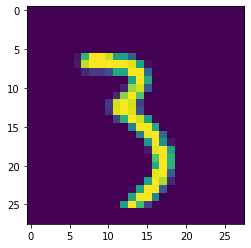

tensor(3)


In [26]:
# Test
import matplotlib.pyplot as plt


plt.imshow(X[3].view(28,28))
plt.show()

print(torch.argmax(net(X[3].view(-1,28*28))))